In [1]:
#Dependencies
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv("train.csv") 
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [3]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

Building Neural Network

In [6]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training model

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 889us/step - loss: 1.4511 - accuracy: 0.2178
Epoch 2/100
29/29 [==============================] - 0s 857us/step - loss: 1.3741 - accuracy: 0.2861
Epoch 3/100
29/29 [==============================] - 0s 857us/step - loss: 1.3154 - accuracy: 0.3622
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2566 - accuracy: 0.4094
Epoch 5/100
29/29 [==============================] - 0s 610us/step - loss: 1.1904 - accuracy: 0.4600
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1171 - accuracy: 0.5039
Epoch 7/100
29/29 [==============================] - 0s 875us/step - loss: 1.0394 - accuracy: 0.5478
Epoch 8/100
29/29 [==============================] - 0s 857us/step - loss: 0.9626 - accuracy: 0.5856
Epoch 9/100
29/29 [==============================] - 0s 857us/step - loss: 0.8885 - accuracy: 0.6122
Epoch 10/100
29/29 [==============================] - 0s 857us/step - loss: 0.8193 - accuracy: 

In [9]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 0s/step


In [10]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 94.5


In [11]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9950 - val_loss: 0.1225 - val_accuracy: 0.9500
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9956 - val_loss: 0.1193 - val_accuracy: 0.9500
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9967 - val_loss: 0.1211 - val_accuracy: 0.9500
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9956 - val_loss: 0.1204 - val_accuracy: 0.9500
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9950 - val_loss: 0.1219 - val_accuracy: 0.9500
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9961 - val_loss: 0.1209 - val_accuracy: 0.9500
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9978 - val_loss: 0.1205 - val_accuracy: 0.9500
Epoch 8/100
2

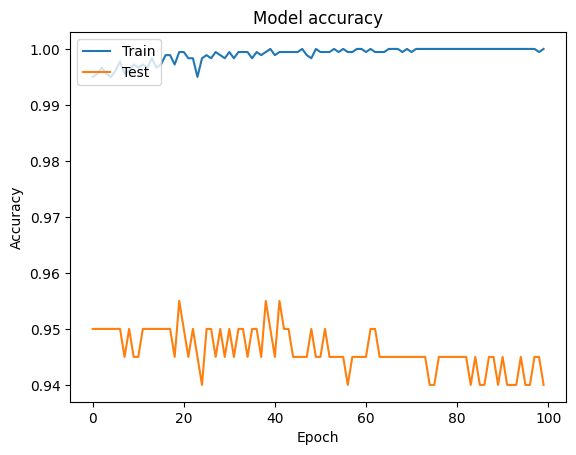

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

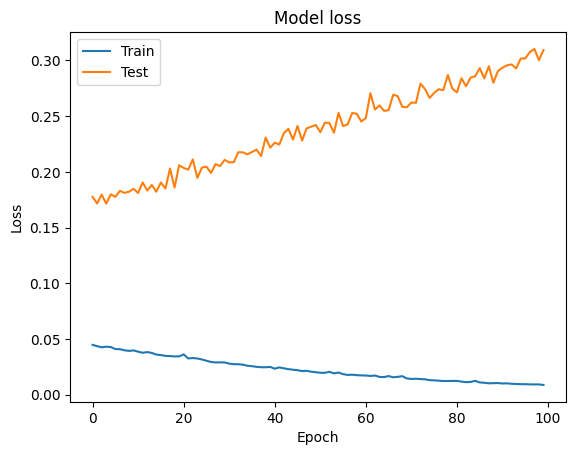

In [15]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()